# 시계열 데이터 
* 설치방법
prophet은 페이스북에서 개발한 시계열 예측 패키지.
ARIMA와 같은 확률론적이고 이론적인 모형이 아니라 몇가지 경험적 규칙을 사용하는 단순회귀모형이지만 단기적 예측에서는 큰 문제없이 사용 할 수 있다.

* [페이스북 깃헙](https://github.com/facebook/prophet)
* [고락가락닷컴](https://gorakgarak.tistory.com/1255)
* [관련논문](https://peerj.com/preprint/3190/pdf)

## 7.1 Numpy의 polyfit으로 회귀분석 하기 

In [1]:
import platform 
import pandas as pd
from fbprophet import Prophet
from datetime import datetime

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 스래드 설정 - 커널 죽을때.
import os
os.environ['NUMEXPR_MAX_THREADS'] = '16'
os.environ['NUMEXPR_NUM_THREADS'] = '8'
import numexpr as ne
%matplotlib inline

### 가끔 가다 커널이 죽을때가 있다.
* `pip uninstall pystan` --> `pip install pystan` 단, 삭제후에 재부팅하고 인스톨 이후에 재부팅
그래야 정상적으로 적용이 된다.

In [58]:
# 한글 폰트 설치 
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    re('font', family == 'AppleGothic')
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
else:
    print('Unknown system... sorry~~~~')    

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 헤더가 없는 csv파일 읽기 
# 시계열 데이터는 시계열성의 컬럼이 인덱스로 잡혀야 함.
pweb = pd.read_csv("../data/08. PinkWink Web Traffic.csv",encoding = 'utf-8',
                  thousands = ',',
                  names = ["date", "hit"],
                  index_col = 0)
pweb = pweb[pweb['hit'].notnull()]

In [5]:
pweb.head(n = 5)

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [6]:
pweb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


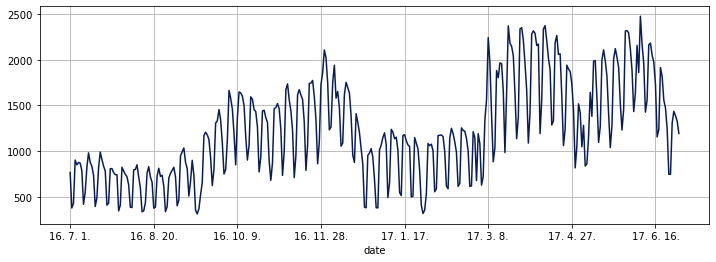

In [4]:
pweb['hit'].plot(figsize = (12, 4), grid = True, kind = 'line', colormap="YlGnBu_r")

In [5]:
time = np.arange(0, len(pweb))
traffic = pweb['hit'].values   # 방문자수 

time, traffic

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [6]:
# np.linspace(start, stop, num)  # start ~ stop이 num간격으로    
fx = np.linspace(0, time[-1], 1000)

In [7]:
#  평균제곱오차 
#  f(x) : 예측값
#  y    : 실제값
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y)**2))

In [8]:
# polyfit()함수는 입력과 출력 값으로 다항식으로 계수를 찾아주는 함수 
# x, y를 알고있다면 다항식의 계수값 a, b, c를 찾아준다는 의미
fp1 = np.polyfit(time, traffic, 1)
a,b = fp1 # 찾은 다항식의 계수 리턴 
print('a : {0}, b: {1}'.format(a, b))
f1 = np.poly1d(fp1)
print(f1)   # 2.948 x + 678.4

a : 2.947511370282535, b: 678.3995059510444
 
2.948 x + 678.4


In [9]:
fp2 = np.polyfit(time, traffic, 2)
a, b, c = fp2
# a : -0.0014216428346871459, b : 3.46498936210866 , c: 647.0920874455634
print('a : {0}, b : {1} , c: {2}'.format(a, b, c))

f2 = np.poly1d(fp2)  # 위에서 찾은 a, b를 가지고 다항식을 만들어줌.
print(f2)   # -0.001422 x + 3.465 x + 647.1

a : -0.0014216428346871459, b : 3.46498936210866 , c: 647.0920874455634
           2
-0.001422 x + 3.465 x + 647.1


In [10]:
fp3 = np.polyfit(time, traffic, 3)
a, b, c, d = fp3
print('a : {0}, b : {1} , c: {2}, d: {3}'.format(a, b, c, d))
f3 = np.poly1d(fp3)  # 위에서 찾은 a, b를 가지고 다항식을 만들어줌.
print(f3)   # 3.341e-05 x - 0.01966 x + 6.117 x + 567.2

a : 3.340721531281761e-05, b : -0.019661982395485507 , c: 6.117141415691795, d: 567.1957521013545
           3           2
3.341e-05 x - 0.01966 x + 6.117 x + 567.2


In [11]:
fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)
print('fp15 , f15 ', fp15, f15)

fp15 , f15  [ 2.37543565e-29 -6.18483056e-26  7.30048308e-23 -5.16077668e-20
  2.42917556e-17 -8.00160286e-15  1.88603965e-12 -3.19726654e-10
  3.86604179e-08 -3.26710510e-06  1.87093075e-04 -7.04464806e-03
  1.76802148e-01 -3.15304048e+00  3.27804398e+01  6.17394510e+02]            15             14           13             12             11
2.375e-29 x  - 6.185e-26 x  + 7.3e-23 x  - 5.161e-20 x  + 2.429e-17 x 
              10             9             8             7
 - 8.002e-15 x  + 1.886e-12 x - 3.197e-10 x + 3.866e-08 x
              6             5            4          3         2
 - 3.267e-06 x + 0.0001871 x - 0.007045 x + 0.1768 x - 3.153 x + 32.78 x + 617.4


In [12]:
# 잔차제곱합 구하기 
# 구항 다항식이 첫번째 인자이다.
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946943
429.53280466762925
330.47773026564636


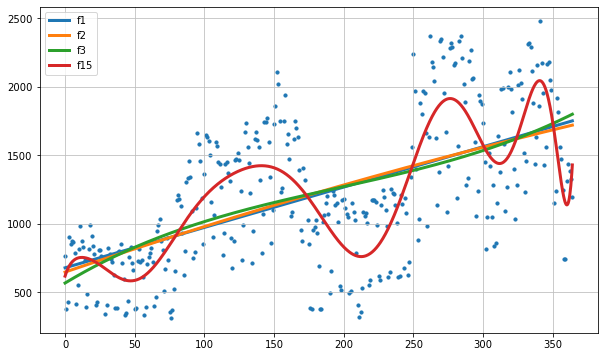

In [13]:
plt.figure(figsize = (10, 6))
plt.scatter(time, traffic, s = 10)
plt.plot(fx, f1(fx), lw = 3, label = 'f1')
plt.plot(fx, f2(fx), lw = 3, label = 'f2')
plt.plot(fx, f3(fx), lw = 3, label = 'f3')
plt.plot(fx, f15(fx), lw = 3, label = 'f15')

plt.grid(True, linestyle = '-', color = '0.75')
plt.legend(loc = 2)
plt.show()

## 2. Prophet모듈을 이용한 forecast예측
* 날짜와 방문수만 따로 저장

In [14]:
pweb.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [15]:
pweb.index, pweb.columns

(Index(['16. 7. 1.', '16. 7. 2.', '16. 7. 3.', '16. 7. 4.', '16. 7. 5.',
        '16. 7. 6.', '16. 7. 7.', '16. 7. 8.', '16. 7. 9.', '16. 7. 10.',
        ...
        '17. 6. 21.', '17. 6. 22.', '17. 6. 23.', '17. 6. 24.', '17. 6. 25.',
        '17. 6. 26.', '17. 6. 27.', '17. 6. 28.', '17. 6. 29.', '17. 6. 30.'],
       dtype='object', name='date', length=365),
 Index(['hit'], dtype='object'))

In [16]:
df = pd.DataFrame({'ds': pweb.index, 'y': pweb['hit']})
df.reset_index(inplace = True)

df['ds'] = pd.to_datetime(df['ds'], format = "%y. %m. %d.")
del df['date']

In [17]:
m = Prophet(yearly_seasonality = True)  # 주기성이 연단위가 있다고 알려줌.
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# 60일간의 데이터프레임을 예측하고 싶다.
future = m.make_future_dataframe(periods = 60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [19]:
# predict : 신뢰 구간을 포함한 예측 실행
forecast = m.predict(future)
forecast.head(n = 3)
forecast[["ds", "yhat", "yhat_upper"]].tail()

,ds,yhat,yhat_upper
420,2017-08-25,908.312485,1122.112133
421,2017-08-26,493.269868,702.044235
422,2017-08-27,625.855539,837.553127
423,2017-08-28,1178.497203,1382.662637
424,2017-08-29,1214.444999,1421.991361


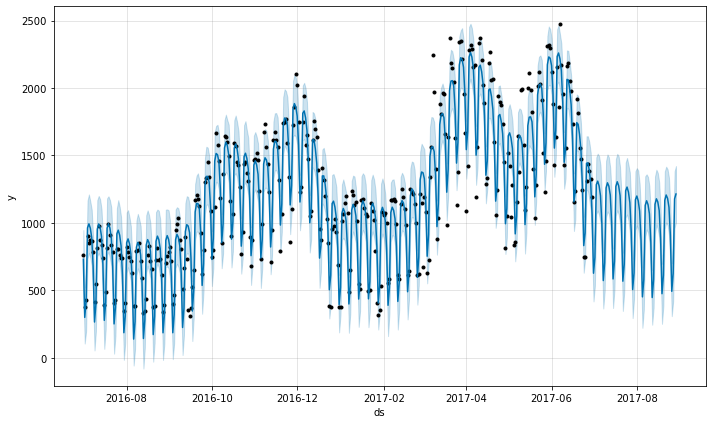

In [21]:
# plot: 원래의 시계열 데이터와 예측 데이터 
m.plot(forecast);

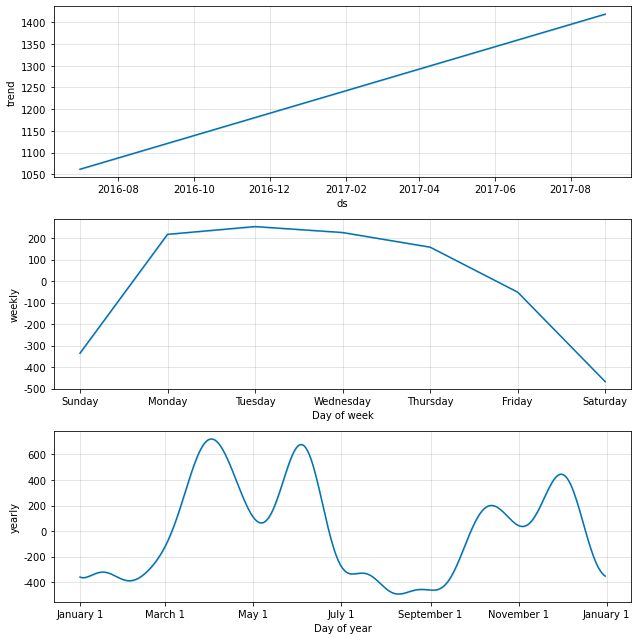

In [22]:
# plot_components : 선형회귀 및 계절성 
m.plot_components(forecast);

### 3.Seasonal 시계열 분석으로 주식 데이터 분석하기 
python 3.6에서는 DataReader의 web을 통해 구글과 야후 파이낸스 주식자료를 뽑아내는 API가 막힘.
* 야후는 fix_yahoo_finance(https://pyi.org/project/fix-yahoo-finance/)참고해서 작성
* 위의 경우 **web.DataReader**가 아닌 , **data.get_data_yahoo**라는 메소드를 써야함.
* pandas_datareader패키지의 DataReader함수는 웹상의 데이터를 DataFrame객체로 만드는 기능을 제공합니다.
* https://finance.yahoo.com
* `pip install pandas-datareader`

In [23]:
from pandas_datareader import data

#### 주식정보 가져오기

#### 방법1
* `DataReader(주가종목코드, 시작일자, 종료일자)`

#### 현대자동차 

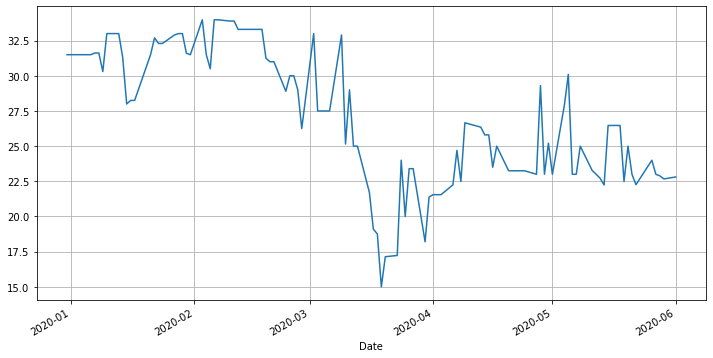

In [24]:
## HYMTF
start = datetime(2020, 1, 1)
end = datetime(2020, 6, 1)

hyundai = web.DataReader("HYMTF", 'yahoo', start, end)
hyundai.head()

hyundai['Close'].plot(kind ='line', figsize = (12, 6), grid = True)

### 코스피

In [25]:
## yahoo
start = datetime(2020,1,1)
end = datetime(2020,6,1)

# df = data.get_data_yahoo("^KS11", start, end)
df = web.DataReader("^KS11",'yahoo', start, end)
df.head()
# Adj Close : 주식의 분할, 배당, 배분등을 고려해 조정한 종가
# High : 고가 , Low: 저가, Open : 시가, Close : 종가 
# Volume : 거래량

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


#### 방법2
* `get_data_yahoo(주가종목코드, 시작일자, 종료일자)`

### 코스피 

In [26]:
start = datetime(2020,1,1)
end = datetime(2020,6,1)
df = web.get_data_yahoo("^KS11", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


### 기아자동차 주식

In [28]:
start = datetime(2003, 1, 1)
end   = datetime(2017, 6, 30)

KIA = web.get_data_yahoo('000270.KS',start, end)
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-18,80500,79300,79400,80000,1758207,80000
2012-06-19,80400,79500,80000,80000,1075002,80000
2012-06-20,81000,79600,80900,80000,885863,80000
2012-06-21,80300,78700,79700,78800,787586,78800
2012-06-22,78200,77200,77900,77500,1091383,77500


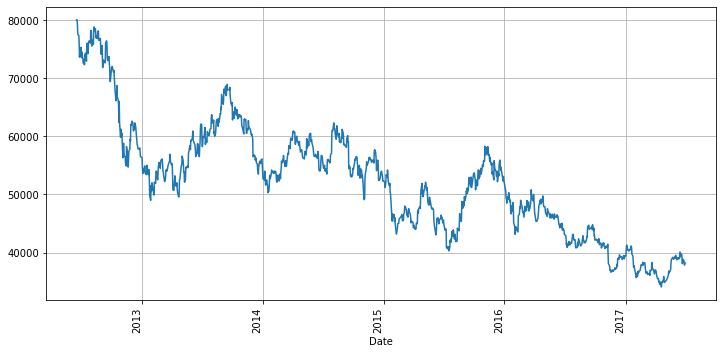

In [29]:
# 종가 기준으로 그래프 그리기
KIA['Close'].plot(figsize=(12, 6), grid = True, rot= 90)

In [30]:
#이미 알고있는 정보이지만 일부 정보를 잘라서 먼저 forecast(학습데이터)
KIA_trunc = KIA[: '2016-06-30']
KIA_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-24,45500,43100,45350,43850,1287451,43850
2016-06-27,44700,43350,43850,44150,1284410,44150
2016-06-28,44350,43600,43650,43900,884143,43900
2016-06-29,44250,43650,44150,43800,999000,43800
2016-06-30,44200,42700,44000,43200,1747483,43200


In [34]:
KIA_trunc.index

DatetimeIndex(['2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21',
               '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27',
               '2012-06-28', '2012-06-29',
               ...
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', name='Date', length=997, freq=None)

In [35]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']
df.head(3)

,ds,y
0,2012-06-18,80000
1,2012-06-19,80000
2,2012-06-20,80000


In [36]:
# 그리고 현재 잘라진 데이터로 학습시키고.
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
# 2017년 12월 31일까지의 데이터를 만들어 예측해봄
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
1357,2017-06-26
1358,2017-06-27
1359,2017-06-28
1360,2017-06-29
1361,2017-06-30


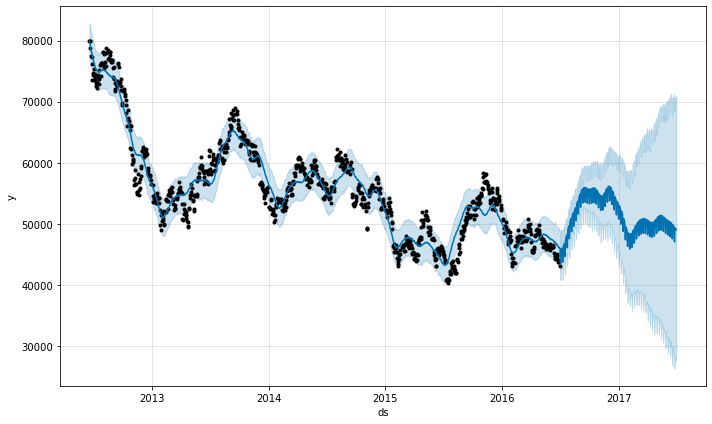

In [38]:
# 예측 데이터로 향후 1년의 주가 추이 예측
forecast = m.predict(future)
type(forecast)  # DataFrame
m.plot(forecast);  # 하락 추세이다.

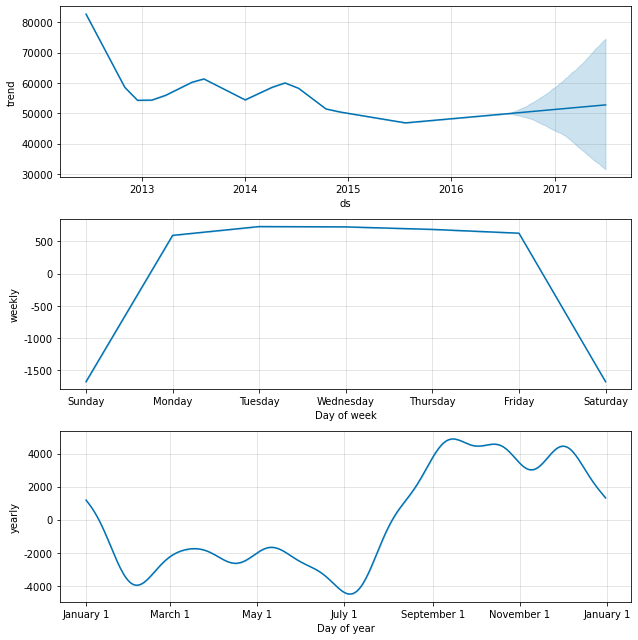

In [41]:
m.plot_components(forecast);

#### 주가를 가져오는 날짜를 바꿔 다시 예측해봄

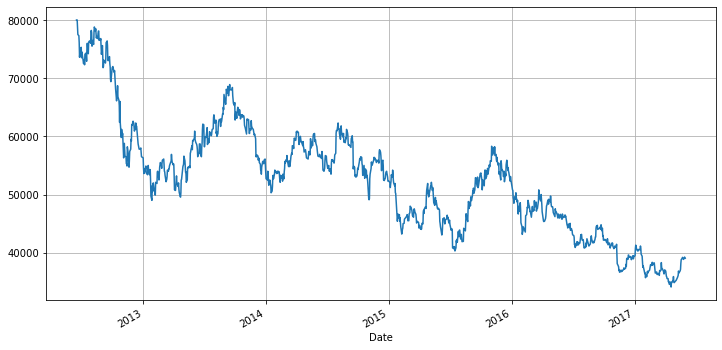

In [42]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize = (12, 6), grid = True)

In [43]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y': KIA_trunc.Close})
df.reset_index(inplace = True)
del df['Date']

In [45]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods = 61)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1279,2017-07-27
1280,2017-07-28
1281,2017-07-29
1282,2017-07-30
1283,2017-07-31


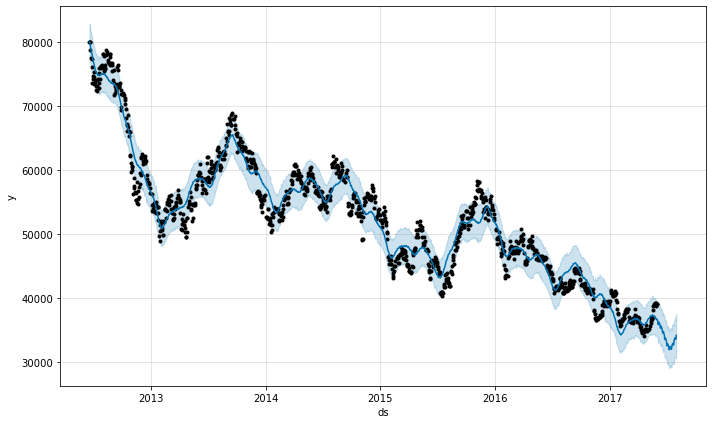

In [46]:
# 예측
forecast = m.predict(future)
m.plot(forecast);

#### 실제 주가와 예측치의 비교

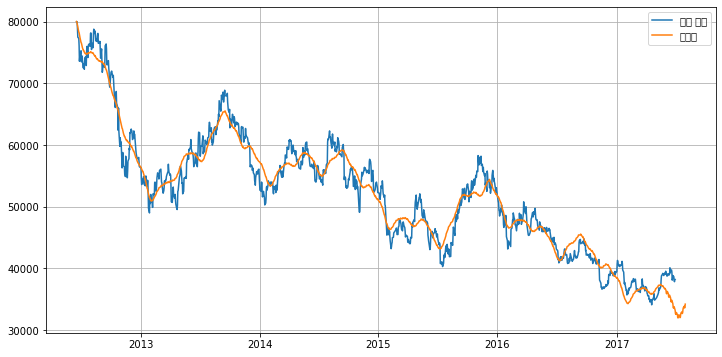

In [47]:
plt.figure(figsize = (12, 6))
plt.plot(KIA.index, KIA.Close, label = '실제 주가')
plt.plot(forecast['ds'], forecast['yhat'], label = '예측치')
plt.grid()
plt.legend()
plt.show()

## 삼정전자 주가 정보

In [48]:
# 삼성전자 : 005930.KS
start = '2009-1-1'
end   = '2019-3-31'

SAM = data.get_data_yahoo('005930.KS', start, end)
SAM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-25,45650.0,44800.0,45300.0,45500.0,8699728.0,45500.0
2019-03-26,45700.0,44900.0,45500.0,45250.0,9729811.0,45250.0
2019-03-27,45600.0,44250.0,44750.0,45350.0,9568081.0,45350.0
2019-03-28,45200.0,44300.0,44950.0,44850.0,6821306.0,44850.0
2019-03-29,44900.0,44200.0,44500.0,44650.0,11491713.0,44650.0


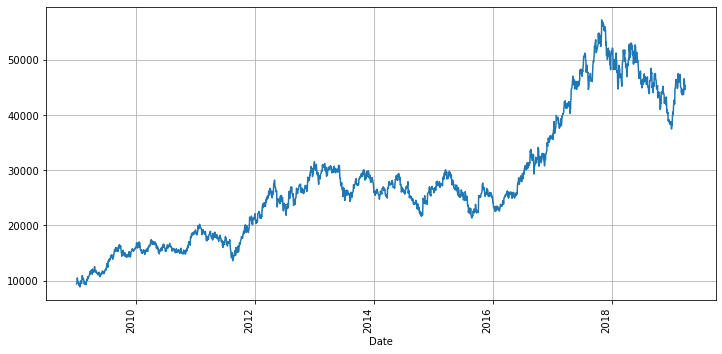

In [49]:
# 2019-03-29월까지의 주식 추이
SAM['Close'].plot(figsize = (12, 6), grid = True, rot = 90)

In [50]:
SAM_trunc = SAM[:'2017-12-31']
SAM_trunc.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,9400.0,8850.0,9070.0,9400.0,22978400.0,1.705819
2009-01-05,9740.0,9470.0,9600.0,9520.0,30460450.0,1.727595
2009-01-06,10040.0,9590.0,9640.0,9960.0,45072450.0,1.807442
2009-01-07,10480.0,9980.0,10100.0,10480.0,41286200.0,1.901807
2009-01-08,10380.0,10060.0,10360.0,10160.0,30614600.0,1.843736
2009-01-09,10120.0,9720.0,10060.0,9860.0,30113100.0,1.789295
2009-01-12,9960.0,9740.0,9800.0,9790.0,17708600.0,1.776592
2009-01-13,9860.0,9600.0,9810.0,9830.0,17577200.0,1.783851
2009-01-14,9840.0,9550.0,9790.0,9790.0,19297550.0,1.776592


In [51]:
df = pd.DataFrame({'ds': SAM_trunc.index, 'y': SAM_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']
df.head()

,ds,y
0,2009-01-02,9400.0
1,2009-01-05,9520.0
2,2009-01-06,9960.0
3,2009-01-07,10480.0
4,2009-01-08,10160.0


* `fit()` -> `make_future_datareader()`

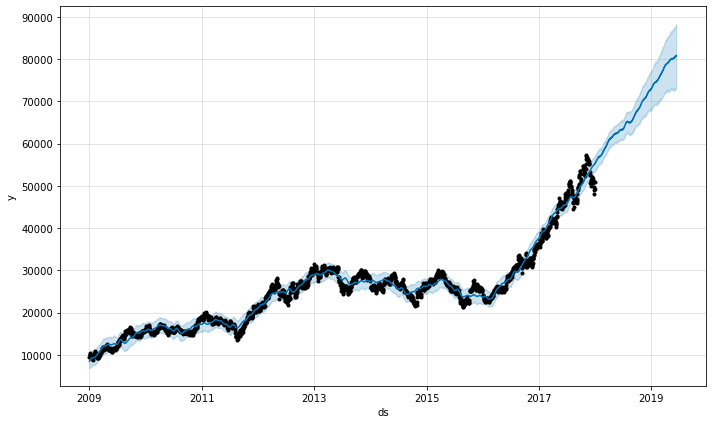

In [52]:
m = Prophet(daily_seasonality = True)
m.fit(df)

future = m.make_future_dataframe(periods = 530)
forecast = m.predict(future)
m.plot(forecast);

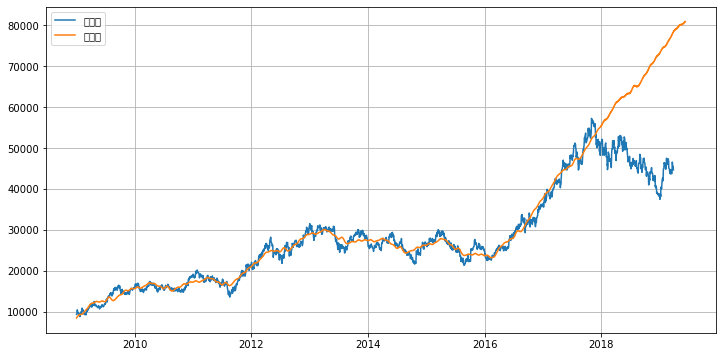

In [55]:
plt.figure(figsize = (12, 6))
plt.plot(SAM.index, SAM['Close'], label = '실주가')
plt.plot(forecast['ds'], forecast['yhat'], label = '예측치')
plt.grid()
plt.legend(loc = 2)
plt.show()

## 카카오 주가 지수

In [56]:
start_date = '2009-1-1'
end_date = '2020-3-31'
KAKA0 = data.get_data_yahoo('035720.KS', start_date, end_date)

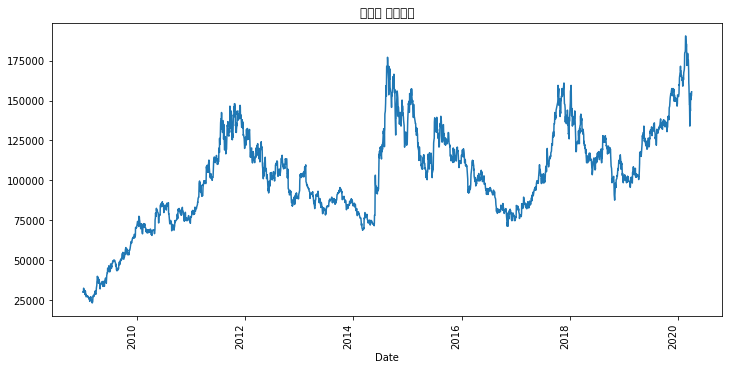

In [57]:
KAKA0['Close'].plot(figsize= (12, 6), rot = 90, title = '카카오 주가지수')

In [137]:
KAKA0_TRUNC = KAKA0[:'2017-12-31']
KAKA0_TRUNC.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,32150.0,30000.0,31800.0,30000.0,276419.0,28382.277344
2009-01-05,30900.0,29700.0,30350.0,29900.0,165820.0,28287.669922
2009-01-06,31150.0,29950.0,30100.0,30750.0,204631.0,29091.835938
2009-01-07,32450.0,30800.0,31150.0,32450.0,249212.0,30700.166016
2009-01-08,32250.0,31350.0,31750.0,31850.0,179786.0,30132.517578
2009-01-09,33100.0,31000.0,32400.0,31600.0,290931.0,29895.998047
2009-01-12,31300.0,29600.0,31100.0,29900.0,160131.0,28287.669922
2009-01-13,29900.0,29100.0,29500.0,29900.0,145652.0,28287.669922
2009-01-14,30950.0,29500.0,29750.0,30950.0,122694.0,29281.048828


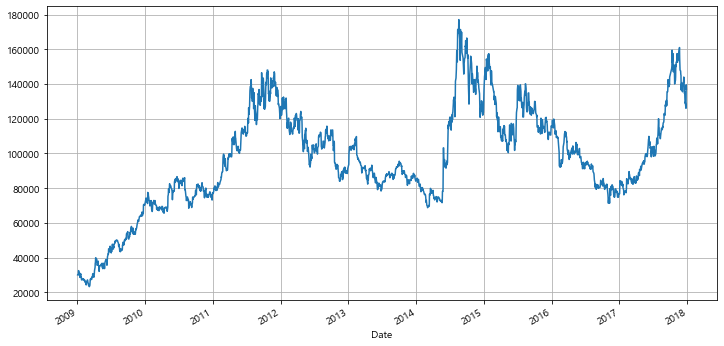

In [139]:
KAKA0_TRUNC['Close'].plot(figsize = (12, 6), grid = True)

In [148]:
df = pd.DataFrame({'ds': KAKA0_TRUNC.index, 'y':KAKA0_TRUNC['Close']})
df.reset_index(inplace  = True)
df.head()
del df['Date']

m = Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True)
m.fit(df)

future = m.make_future_dataframe(periods = 830)
forecast = m.predict(future)

In [149]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3051,2020-04-02,144946.132226,45387.530110,229545.229176,54598.762855,237198.608765,-7906.517480,-7906.517480,-7906.517480,-1157.924499,...,15.842379,15.842379,15.842379,-6764.435359,-6764.435359,-6764.435359,0.0,0.0,0.0,137039.614746
3052,2020-04-03,144981.060833,44829.944075,225959.910017,54594.266679,237394.712771,-8079.933760,-8079.933760,-8079.933760,-1157.924499,...,-83.133062,-83.133062,-83.133062,-6838.876199,-6838.876199,-6838.876199,0.0,0.0,0.0,136901.127073
3053,2020-04-04,145015.989440,44205.918113,227518.903683,54477.143091,237566.333979,-7907.940008,-7907.940008,-7907.940008,-1157.924499,...,144.740487,144.740487,144.740487,-6894.755996,-6894.755996,-6894.755996,0.0,0.0,0.0,137108.049432
3054,2020-04-05,145050.918048,43925.726631,226943.494384,54283.287291,237735.525409,-7944.192775,-7944.192775,-7944.192775,-1157.924499,...,144.740674,144.740674,144.740674,-6931.008950,-6931.008950,-6931.008950,0.0,0.0,0.0,137106.725273
3055,2020-04-06,145085.846655,48320.198083,229915.466358,54089.431491,237898.937974,-8416.047566,-8416.047566,-8416.047566,-1157.924499,...,-311.082073,-311.082073,-311.082073,-6947.040994,-6947.040994,-6947.040994,0.0,0.0,0.0,136669.799089


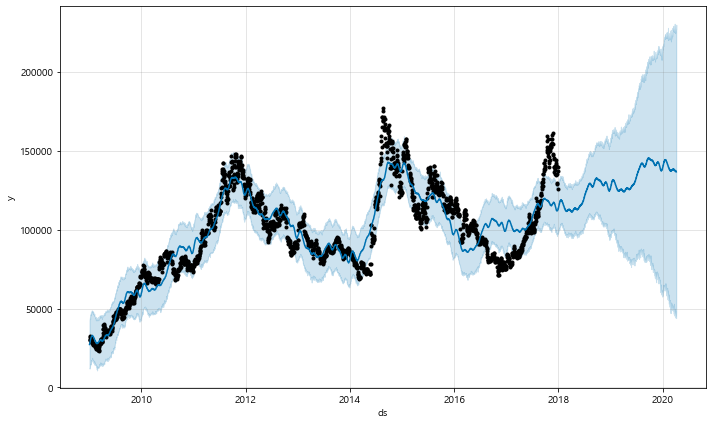

In [151]:
m.plot(forecast);

### 실주가 지수와 예측지수 비교

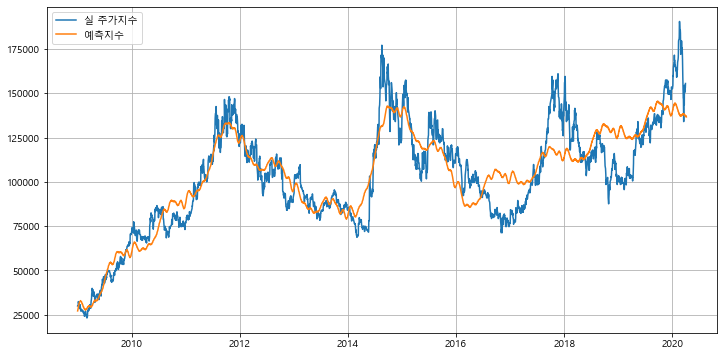

In [153]:
plt.figure(figsize = (12, 6))
plt.title = '카카오 주가 예측'
plt.plot(KAKA0.index, KAKA0['Close'], label = '실 주가지수')

plt.plot(forecast['ds'], forecast['yhat'], label = '예측지수')
plt.grid()
plt.legend(loc = 2)
plt.show()

## 4. Growth Model

In [154]:
df = pd.read_csv("../data/08. example_wp_R.csv")
df.head()

,ds,y
0,2008-01-30,394
1,2008-01-16,424
2,2008-01-17,408
3,2008-01-14,385
4,2008-01-15,369


In [156]:
# `y`의 값에 자연로그를 취한 값
df['y'] = np.log(df['y'])
df.head(n =5)
df.tail(n = 5)

,ds,y
2858,2015-12-11,2.058574
2859,2015-12-12,1.996074
2860,2015-12-13,2.012215
2861,2015-12-18,2.049645
2862,2015-12-19,1.976907


In [157]:
df['cap'] = 8.5  # 상한값을 제한
df['floor'] = 6  # 하한값을 제한

In [158]:
df

,ds,y,cap,floor
0,2008-01-30,1.787810,8.5,6
1,2008-01-16,1.800014,8.5,6
2,2008-01-17,1.793636,8.5,6
3,2008-01-14,1.783936,8.5,6
4,2008-01-15,1.776781,8.5,6
...,...,...,...,...
2858,2015-12-11,2.058574,8.5,6
2859,2015-12-12,1.996074,8.5,6
2860,2015-12-13,2.012215,8.5,6
2861,2015-12-18,2.049645,8.5,6


In [161]:
m = Prophet(growth = 'logistic', daily_seasonality = True)
m.fit(df)

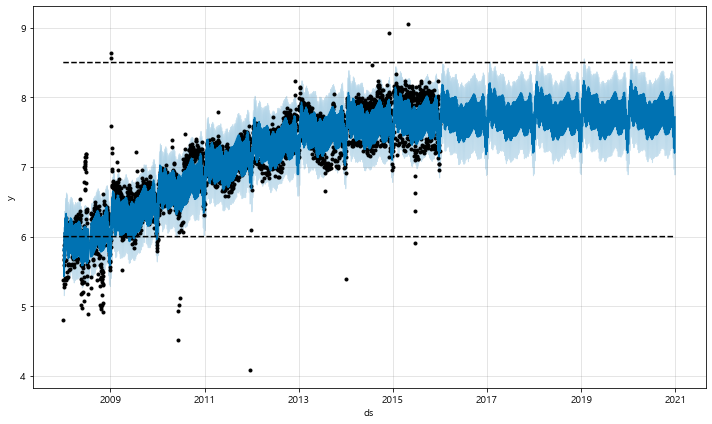

In [59]:
future = m.make_future_dataframe(periods = 1826)
future['cap'] = 8.5 # 상한값
future['floor'] = 6 # 하한값
fcst = m.predict(future)
m.plot(fcst);

In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4684,2020-12-26,7.199648,6.894822,7.500701
4685,2020-12-27,7.207402,6.896532,7.531053
4686,2020-12-28,7.626874,7.314125,7.924596
4687,2020-12-29,7.700556,7.395568,8.008379
4688,2020-12-30,7.718885,7.414447,8.021665


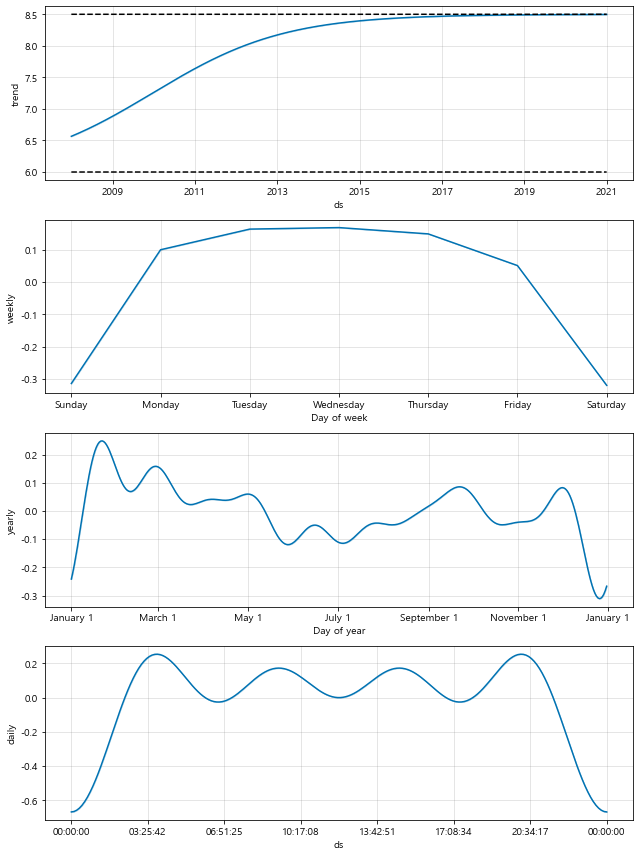

In [61]:
m.plot_components(forecast);

## Quiz

1. 웹사이트 방문 회수 : data : sci_2012_2014

1)조회순을 기준으로 그래프를 그려보세요.

2) Prophet모듈을 이용하여 forecast 예측해 보세요.

3) plot_components로 결과를 확인해 보세요.

4) 이 사이트는 유지해야 하나요? 아니면 닫아야 하나요?

In [27]:
df = pd.read_excel("../data/sci2_2012-2014.xlsx" ,sheet_name = ['2014년', '2013년', '2012년'])
quiz_df = pd.concat([df['2014년'], df['2013년'], df['2012년']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 104
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일     247 non-null    datetime64[ns]
 1   분류      247 non-null    object        
 2   콘텐트타입   240 non-null    object        
 3   조회수     247 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 9.6+ KB


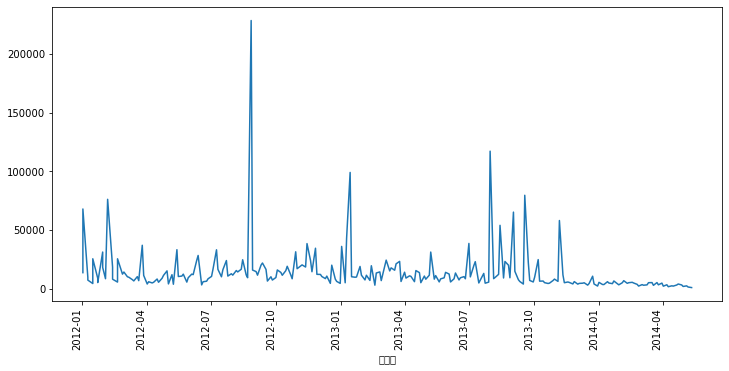

In [28]:
quiz_df.index = quiz_df.등록일
quiz_df['조회수'].plot(kind = 'line', figsize =(12,6) ,rot = 90)

In [23]:
df = pd.DataFrame({'ds':quiz_df.index, 'y':quiz_df['조회수']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['등록일']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

NameError: name 'quiz_df' is not defined

In [156]:
# 해당 periods만큼의 데이터 생성
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
325,2014-08-06
326,2014-08-07
327,2014-08-08
328,2014-08-09
329,2014-08-10


In [157]:
# predict : 신뢰 구간을 포함한 예측 실행
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
325,2014-08-06,10165.983327,-14146.307083,34303.843328
326,2014-08-07,8951.986130,-15770.488533,31381.924226
327,2014-08-08,7705.502016,-15658.123648,33585.739105
328,2014-08-09,10618.987457,-14210.616114,33434.890295
329,2014-08-10,11613.947675,-12078.636393,34669.326686


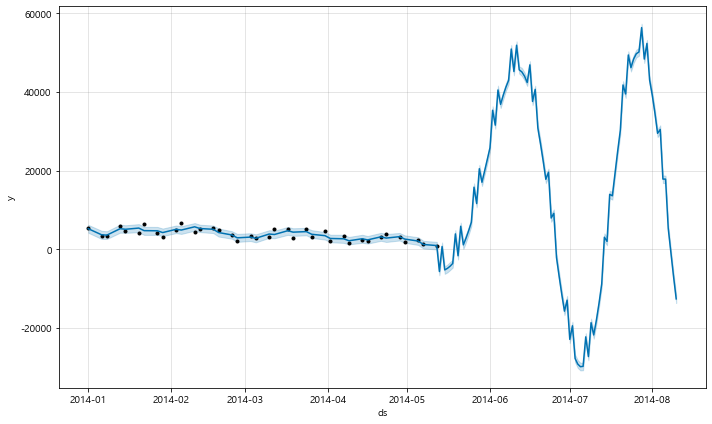

In [124]:
# 검은점은 - 실제값 
# 파란색점 - 예측값
# 과거 데이터를 짤라서 훈련용, 검증용 
m.plot(forecast);

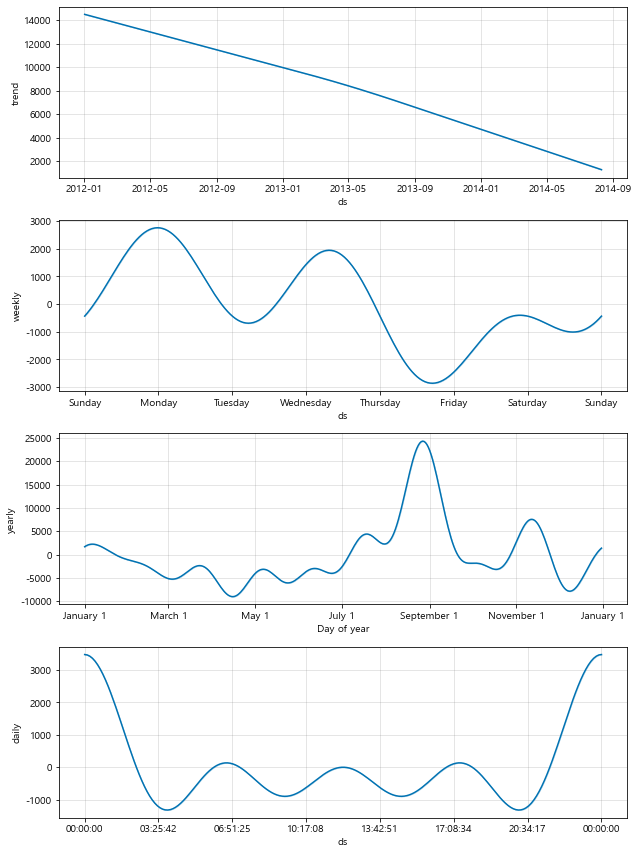

In [158]:
m.plot_components(forecast);

2. 시계열 데이터 분석 : KIA차 주식을 분석하세요. (000270.KS)

1) 2010.01.01~ 2017.12.31일 까지의 시세를 확인하세요.

2) 1)의 기간의 종가(Close)를 기준으로 그래프를 그려 보세요.

3) 1년 후, 2018.12.31일 까지의 정보를 예측해 보세요.

4) 700일 간의 데이터를 예측해 보세요.
실제 데이터와 예측값을 그래프로 그려 보세요.

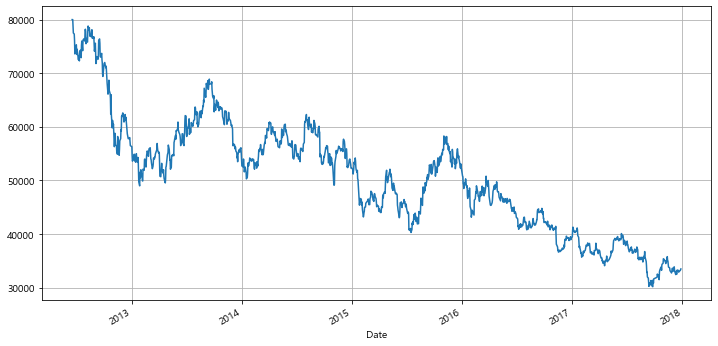

In [127]:
start_date = datetime(2010,1,1)
end_date = datetime(2017,12,31)
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12, 6), grid= True)

In [135]:
#Prophet사용 : ds, y컬럼
kia = pd.DataFrame({'ds': KIA.index, 'y':KIA['Close']})
kia.reset_index(inplace = True)
del kia['Date']
kia.head()

,ds,y
0,2012-06-18,80000.0
1,2012-06-19,80000.0
2,2012-06-20,80000.0
3,2012-06-21,78800.0
4,2012-06-22,77500.0


In [160]:
m = Prophet(daily_seasonality = True)
m.fit(kia);

In [159]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
600,2015-05-08
601,2015-05-09
602,2015-05-10
603,2015-05-11
604,2015-05-12


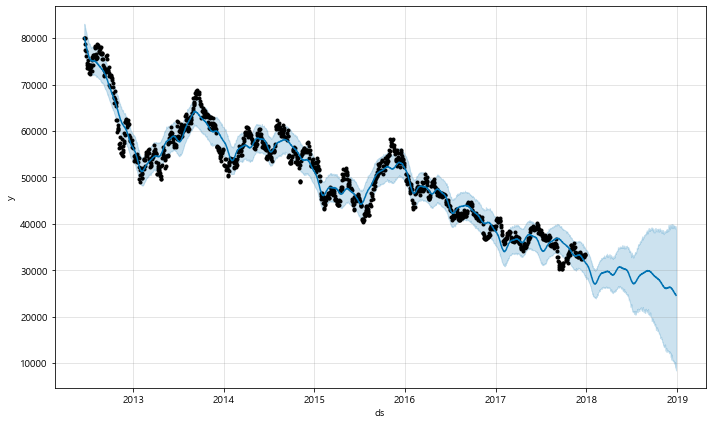

In [138]:
forecast = m.predict(future)
m.plot(forecast);
# 검은점 - 실제 값
# 파란선 - 예측값
# 흐릿한 연한 파란색의 범위 - Hight, Low값 

4) 700일 간의 데이터를 예측해 보세요.<br>
실제 데이터와 예측값을 그래프로 그려 보세요.

In [ ]:
kia = pd.DataFrame({'ds': KIA.index, 'y':KIA['Close']})
kia.reset_index(inplace = True)
del kia['Date']
kia.head()


m = Prophet(daily_seasonality = True)
m.fit(df);

In [ ]:
future = m.make_future_dataframe(periods = 700)

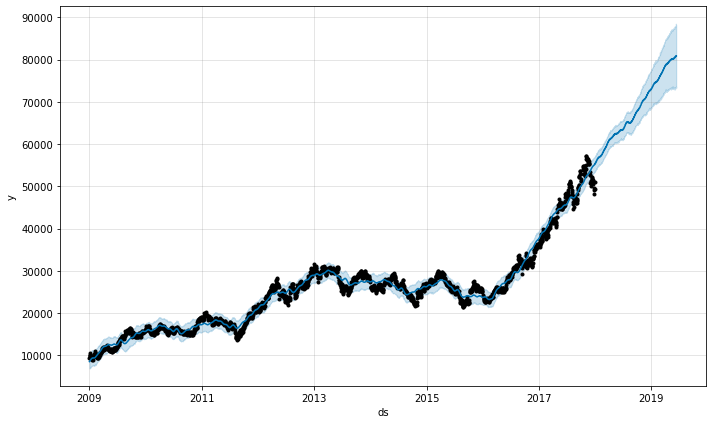

In [60]:
forecast = m.predict(future)
m.plot(forecast);

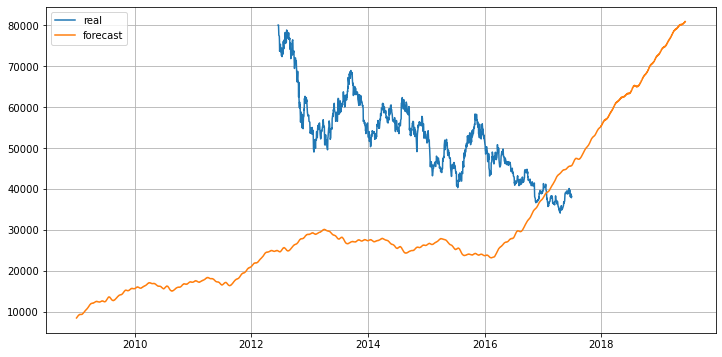

In [59]:
# 실제 주가와 예측치의 비교
plt.figure(figsize = (12, 6))
plt.plot(KIA.index, KIA['Close'], label = 'real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.grid()
plt.legend()
plt.show()